# SLO Twitter Data Analysis  - User Statistics

Setup the Jupyter Notebook kernel for SLO data analysis.

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-27-19.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Most Prolific Users (Tweet Authors) and Post Count:


Listing of the top 5 users (Tweet authors) and the count of how many Tweets they posted in our dataset.<br>



In [2]:
    print("User Statistics for Tweets by Associated Company: ")
    print("Unique Users with Most (highest) Tweet Counts by Associated Company.")
    print(tweet_dataframe[['company_derived_designation', 'user_screen_name']].groupby(
        'company_derived_designation').apply(lambda x: x['user_screen_name'].value_counts(normalize=False).head())
          # .value_counts(normalize=True)\
          # .sort_index(ascending=False).head())
          )

User Statistics for Tweets by Associated Company: 
Unique Users with Most (highest) Tweet Counts by Associated Company.
company_derived_designation                 
adani                        WgarNews           6570
                             GalileeBlockade    3890
                             MarkPlackett1      3238
                             SeanBradbery       3042
                             garland_paige      2930
bhp                          CommSec            1548
                             aus_business        988
                             FinancialReview     872
                             icharttop           813
                             3novicesSydney      598
cuesta                       MaAle21              54
                             monicapalacios       26
                             v4_35                23
                             rjstrikers           15
                             ABN_Newswire         13
fortescue                    FortescueNe


"Adani" Tweet authors have the highest Tweet counts of any company.



## Graph of User (Tweet Author) Appearance Count by Percentage of All Users for a Company:


Below is a plot of the number of times unique users appear as the author of Tweets plotted against what percentage of all unique users that are associated with a given company do they comprise.<br>

The graphs show the number of times a percentage of all the unique users associated with a given company was the author of a Tweet associated with that company.  For example, a y-axis value of 0.4 and a x-axis value of 4 would indicate that 40% of all users associated with that given company was the author of 4 Tweets associated with that company.<br>




Number of Times a Percentage of Users Appears as the Tweet Author for a Given Company: 


<Figure size 432x288 with 0 Axes>

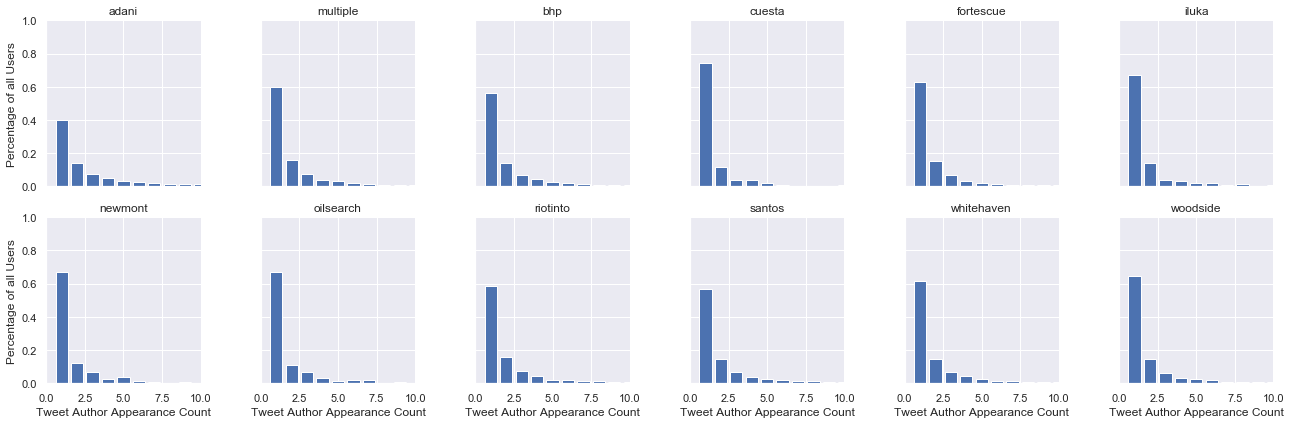

In [3]:
    print("\nNumber of Times a Percentage of Users Appears as the Tweet Author for a Given Company: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['user_screen_name', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(0, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot_zipf, 'user_screen_name')
    grid.set_titles('{col_name}')
    grid.set_xlabels('Tweet Author Appearance Count').set_ylabels("Percentage of all Users")
    plt.show()


The pattern indicates that most unique users (by their screen-names) appear only once or at most a few times.<br>



## Unique Users (Authors):


Displays a list of the unique user screennames in our dataset for Tweet post count.<br>

Note: The list is not exhaustive.  It shows only the head and tail of all the unique users.<br>



In [4]:
    author_series = pd.Series(tweet_dataframe["user_screen_name"])
    print("All Unique Authors by User Screen Name and their Tweet Post Count:")
    print(author_series.value_counts(sort=True, ascending=False))

All Unique Authors by User Screen Name and their Tweet Post Count:
WgarNews           6844
CRAG_Coona         4580
GalileeBlockade    3946
MarkPlackett1      3876
MinhKular          3535
rjstrikers         3386
SeanBradbery       3332
43a6f0ce5dac4ea    3270
coonavass          3041
garland_paige      2979
L_DeWeaver         2953
takvera            2862
blanketcrap        2810
LennaLeprena       2760
CommSec            2698
JHH__              2602
bensab3            2588
JohnLocker4        2572
Aitch_El           2512
WhteRbbnAdvocat    2407
geoffrey_payne     2265
GoldCoastNurse     2246
Green_Living1      2227
aus_business       2224
co2ppm             2210
FinancialReview    2152
overthelies2010    2101
ochreblue          2087
peterjameswills    2086
david_lunt         2074
randlight          2025
3wombats           1999
daveyk317          1941
1EarthMedia        1911
yabbietol          1879
bradhooperarch     1858
LiteFootPrints     1823
DrCnfzd            1786
nocsg              17


There are some unique users (Tweet authors) with very high counts while at the other end of the spectrum we have those who have only posted a single Tweet in our dataset.<br>



In [5]:
    print("The number of unique Tweet authors: ")
    author_df = pd.DataFrame(author_series.value_counts(sort=True, ascending=False))
    print(author_df.shape[0])

The number of unique Tweet authors: 
38107


    
We have far fewer unique Tweet authors than we do Tweets in our dataset.<br>



## User Description Text Length:


Similar to the above graphs, only this provides the character counts for the user description text length.<br>



Character Count Statistics of User Description Text by Associated Company: 
Character Count Relative Frequency Histogram: 


<Figure size 432x288 with 0 Axes>

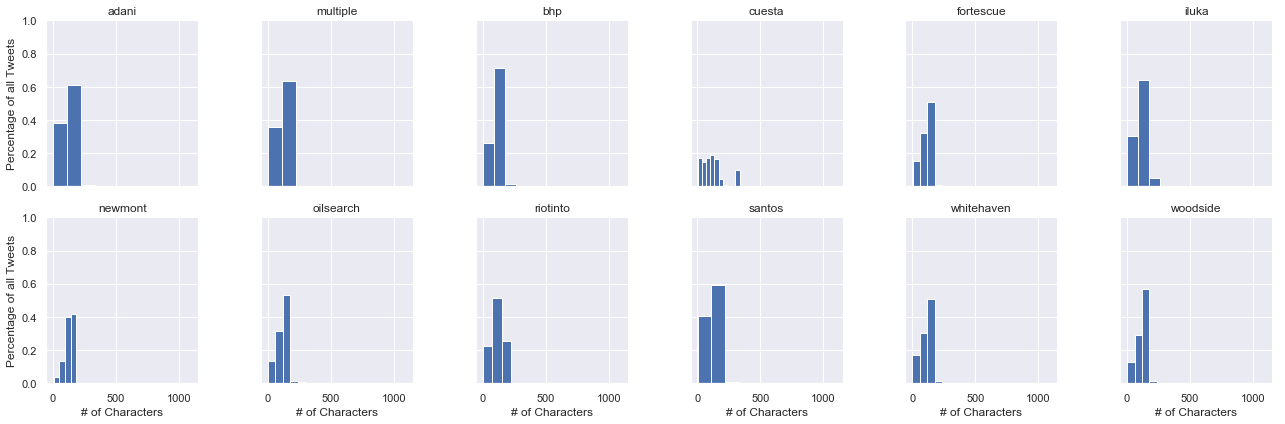

In [6]:
    print("Character Count Statistics of User Description Text by Associated Company: ")
    print("Character Count Relative Frequency Histogram: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['user_description', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util_v2.relhist_proc, 'user_description', bins=10, proc=tweet_util_v2.char_len)
    grid.set_titles('{col_name}')
    grid.set_xlabels("# of Characters").set_ylabels("Percentage of all Tweets")
    plt.show()


The user description text character length counts don't appear to be significantly longer or shorter than the Tweet text character length counts.  We will need to research what the permissible max length is for the user description field and Tweet text field.<br>



## User Description Text versus Tweet Text Length Comparison:


Text statistics below display the # of Tweets over the specified character count for user descriptions and Tweet text.<br>



In [7]:
    character_length = 140
    print(f"The total number of Tweets in the dataset is: {tweet_dataframe.shape[0]}")

    long_tweets = tweet_dataframe.loc[tweet_dataframe["tweet_text_length_derived"] > character_length]
    print(f"The number of Tweets over {character_length} characters is {long_tweets.shape[0]}")

    long_description = tweet_dataframe.loc[tweet_dataframe["user_description_text_length"] > character_length]
    print(f"The number of user descriptions over {character_length} characters is {long_description.shape[0]}")

The total number of Tweets in the dataset is: 670423
The number of Tweets over 140 characters is 375104
The number of user descriptions over 140 characters is 256372


    
Over half of the Tweets are over 140 characters long while only about 40% or so of user description text is over 140 characters long.<br>

